In [37]:
def inp():
  while True:
        try:
            value = float(input())
            return value
        except ValueError:
            print("Error! Это не число, попробуйте снова.")
        else:
            break

#ввод S0 
print("Введите цену близлежащего актива")
S0=inp()

#ввод mu
print("Введите средне ожидаемую доходность")
mu=inp()
            
#ввод sigma
print("Введите стандартное отклонение")
sigma=inp()
            
#ввод T
print("Введите срок действия акции(1)")
T=inp() 

#ввод K
print("Введите величину страйка(1)")
K=inp()  

#ввод T1
print("Введите срок действия акции(2)")
T1=inp()

#ввод K1
print("Введите величину страйка(2)")
K1=inp()
            
dt=1/365

Введите цену близлежащего актива 
100
Введите средне ожидаемую доходность 
0.08
Введите стандартное отклонение 
0.3
Введите срок действия акции(1) 
1
Введите величину страйка(1) 
100
Введите срок действия акции(2) 
0.5
Введите величину страйка(2) 
100


#Geometric Brownian Motion

In [5]:
price_paths = []

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math

class GeometricBrownianMotion:

    def simulate_paths(self):
        while(self.T - self.dt > 0):
            dWt = np.random.normal(0, math.sqrt(self.dt))  # Brownian motion
            dYt = self.drift*self.dt + self.volatility*dWt  # Change in price
            self.current_price += dYt  # Add the change to the current price
            self.prices.append(self.current_price)  # Append new price to series
            self.T -= self.dt  # Accound for the step in time

    def __init__(self, S0, mu, sigma, dt, T):
        self.current_price = S0
        self.initial_price = S0
        self.drift = mu
        self.volatility = sigma
        self.dt = dt
        self.T = T
        self.prices = []
        self.simulate_paths()

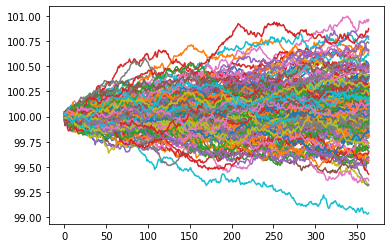

In [16]:
# Generate a set of sample paths
paths=100
for i in range(0, paths):
    price_paths.append(GeometricBrownianMotion(S0, mu, sigma, dt, T).prices)

# Plot the set of generated sample paths
for price_path in price_paths:
    plt.plot(price_path)
plt.show()

# Monte Carlo

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math


class European_Call_Payoff:

    def __init__(self, strike):
        self.strike = strike

    def get_payoff(self, stock_price):
        if stock_price > self.strike:
            return stock_price - self.strike
        else:
            return 0



In [19]:
call_payoffs = []
ec = European_Call_Payoff(K)
for price_path in price_paths:
    call_payoffs.append(ec.get_payoff(price_path[-1])/(1 + mu))  # We get the last stock price in the series generated by GBM to determin the payoff and discount it by one year


print(np.average(call_payoffs)*100)  # Options are in blocks of 100

15.543608113795464


# Compound option

In [43]:
for i in range(0, paths):
    price_paths.append(GeometricBrownianMotion(S0, mu, sigma, dt, T1).prices)

call_payoffs = []
ec = European_Call_Payoff(K1)
for price_path in price_paths:
    call_payoffs.append(ec.get_payoff(price_path[-1])/(1 + mu))  # We get the last stock price in the series generated by GBM to determin the payoff and discount it by one year

V=np.average(call_payoffs)*100

VC=max(V-K1,0)
print(VC)

0
